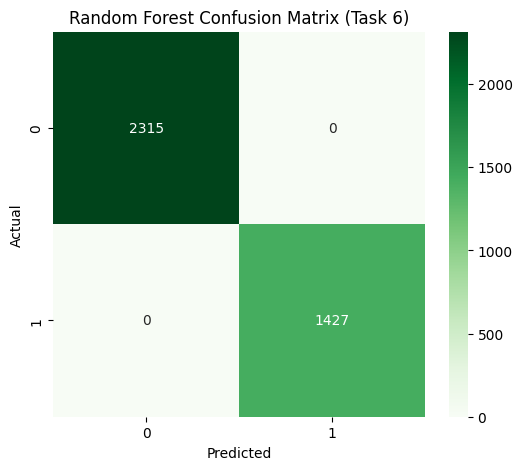

<Figure size 800x600 with 0 Axes>

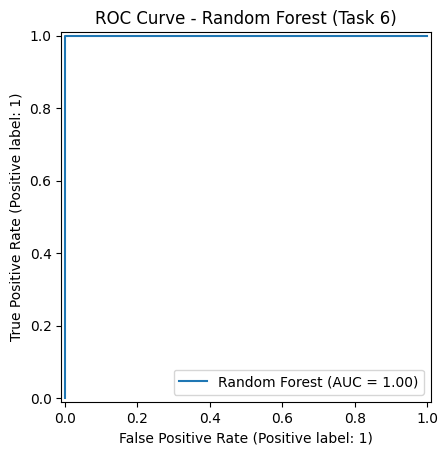

✅ Task 6 Model Metrics Table


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Random Forest,1.0,1.0,1.0,1.0,1.0


In [2]:
# Task 6 Visualizations - All in one cell
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, RocCurveDisplay
import joblib

# -----------------------------
# Paths
# -----------------------------
processed_path = r"C:\Users\assef\Desktop\Kifiya AI Mastery\week4\credit-risk-model\data\processed"
task4_csv_path = os.path.join(processed_path, "task4_features.csv")
best_model_path = os.path.join(processed_path, "best_model_rf.joblib")

# -----------------------------
# Load data and model
# -----------------------------
df = pd.read_csv(task4_csv_path)
X = df.drop(columns=['CustomerId', 'is_high_risk'])
y = df['is_high_risk']

# Scaling numeric columns
numeric_cols = X.select_dtypes(include='number').columns.tolist()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Load trained model
best_rf = joblib.load(best_model_path)

# -----------------------------
# Generate Predictions
# -----------------------------
y_pred_rf = best_rf.predict(X)
y_proba_rf = best_rf.predict_proba(X)[:, 1]

# For demonstration: use Logistic Regression dummy predictions if available
# y_pred_lr = ...
# y_proba_lr = ...

# -----------------------------
# Confusion Matrix
# -----------------------------
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix (Task 6)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# ROC Curve
# -----------------------------
plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(best_rf, X, y, name='Random Forest')
plt.title("ROC Curve - Random Forest (Task 6)")
plt.show()

# -----------------------------
# Metrics Table
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_rf = {
    'Accuracy': accuracy_score(y, y_pred_rf),
    'Precision': precision_score(y, y_pred_rf),
    'Recall': recall_score(y, y_pred_rf),
    'F1 Score': f1_score(y, y_pred_rf),
    'ROC-AUC': roc_auc_score(y, y_proba_rf)
}

metrics_df = pd.DataFrame([metrics_rf], index=['Random Forest'])
print("✅ Task 6 Model Metrics Table")
metrics_df
